# <font color=blue>K-Means

## <font color=red>Credit Card dataset
<img src = creditcard.jpg >
    
This case requires to develop a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :
CUST_ID / BALANCE / BALANCE_FREQUENCY / PURCHASES / ONEOFF_PURCHASES / INSTALLMENTS_PURCHASES / CASH_ADVANCE / PURCHASES_FREQUENCY / ONEOFF_PURCHASES_FREQUENCY / PURCHASES_INSTALLMENTS_FREQUENCY / CASH_ADVANCE_FREQUENCY / CASH_ADVANCE_TRX
PURCHASES_TRX / CREDIT_LIMIT / PAYMENTS / MINIMUM_PAYMENTS / PRC_FULL_PAYMENT / TENURE


- CUST_ID : Identification of Credit Card holder (Categorical) 
- BALANCE : Balance amount left in their account to make purchases 
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated) 
- PURCHASES : Amount of purchases made from account 
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go 
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment   
- CASH_ADVANCE : Cash in advance given by the user 
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased) 
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased) 
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done) 
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid 
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced" 
- PURCHASES_TRX : Number of purchase transactions made 
- CREDIT_LIMIT : Limit of Credit Card for user 
- PAYMENTS : Amount of Payment done by user 
- MINIMUM_PAYMENTS : Minimum amount of payments made by user 
- PRCFULLPAYMENT : Percent of full payment paid by user 
- TENURE : Tenure of credit card service for user

# <font color=green>Step-by-step Project and Comments (below)

# 1) Importing libraries

In [3]:
'''
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
'''

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2) Loading dataset

In [4]:
import pandas as pd

In [4]:
df = pd.read_csv("CC GENERAL.csv")

# 3) EAD + Feature Engineering

In [5]:
# close look at the dataset
df.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8940,C19181,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6
8942,C19183,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


<font color=blue>In this dataset we have different types of units of measurement (below), which means that we must apply a Data Pre-processing: tool to assess the features
- [code + sequencial number] CUST_ID
- [US] BALANCE
- [%] BALANCE_FREQUENCY 
- [US] PURCHASES 
- [US] ONEOFF_PURCHASES
- [US] INSTALLMENTS_PURCHASES
- [US] CASH_ADVANCE
- [%] PURCHASES_FREQUENCY
- [%] ONEOFFPURCHASESFREQUENCY
- [%] PURCHASESINSTALLMENTSFREQUENCY
- [%] CASHADVANCEFREQUENCY
- [integer] CASHADVANCETRX
- [integer] PURCHASES_TRX
- [US] CREDIT_LIMIT
- [US] PAYMENTS
- [US] MINIMUM_PAYMENTS
- [%] PRCFULLPAYMENT
- [code+integer] TENURE

# <font color=blue> || Running the code to drop CUST ID, once it's just a sequencial number useless for the assessment

In [6]:
# drop useless features
df.drop('CUST_ID', axis=1, inplace=True)

In [7]:
# lines and columns of the dataset
df.shape

(8950, 17)

In [8]:
# Quick overview of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT           

In [9]:
# checking missing values
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
! pip install missingno

In [11]:
import missingno
missingno.matrix(df, figsize = (40,20))

In [12]:
(df.isnull().sum()* 100 / len(df)).sort_values(ascending=False).head(10)

MINIMUM_PAYMENTS                    3.497207
CREDIT_LIMIT                        0.011173
TENURE                              0.000000
PURCHASES_FREQUENCY                 0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
dtype: float64

<font color=blue> Running the codes tell us that only 2 features have got null values 'CREDIT_LIMIT' and 'MINIMUM_PAYMENTS'. Those missing values correspond to less than 4% of the whole dataset. Actually, the missing values are not a big deal in this dataset; perhaps we just need to fill the missing spots with a sensible replacement value (ex:. mean, median, zero, max, min, etc) and keep using the feature in our analysis.  

In [13]:
# Just checking .describe functions (std, mean, max, min, and so on)
df.CREDIT_LIMIT.describe().round(2), df.MINIMUM_PAYMENTS.describe().round(2)

(count     8949.00
 mean      4494.45
 std       3638.82
 min         50.00
 25%       1600.00
 50%       3000.00
 75%       6500.00
 max      30000.00
 Name: CREDIT_LIMIT, dtype: float64, count     8637.00
 mean       864.21
 std       2372.45
 min          0.02
 25%        169.12
 50%        312.34
 75%        825.49
 max      76406.21
 Name: MINIMUM_PAYMENTS, dtype: float64)

In [14]:
# Just checking the median value
df.CREDIT_LIMIT.median().round(2), df.MINIMUM_PAYMENTS.median().round(2)

(3000.0, 312.34)

In [15]:
# Just checking the most common value
df.CREDIT_LIMIT.value_counts().index[0], df.MINIMUM_PAYMENTS.value_counts().index[0] 

(3000.0, 299.351881)

In [16]:
# mode calculation (the same former calculation)
df.CREDIT_LIMIT.mode(), df.MINIMUM_PAYMENTS.mode() 

(0    3000.0
 dtype: float64, 0    299.351881
 dtype: float64)

CREDIT_LIMIT
- mean         4494.45
- media        3000.0
- most common or mode  3000.0

MINIMUM_PAYMENTS
- mean         864.21
- media        312.34
- most common or mode  299.35

# <font color=blue> || Running the code to fill empty spots with MEAN value

In [17]:
# fill null value by using its mean
df = df.fillna(df.mean())

In [18]:
# Double-check tool to assure that missing values are gone
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## <font color=blue>Data Visualization   

### <font color=blue>* SEARCHING FOR OUTLIERS

<font color=blue>BOX PLOT

In [19]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [20]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


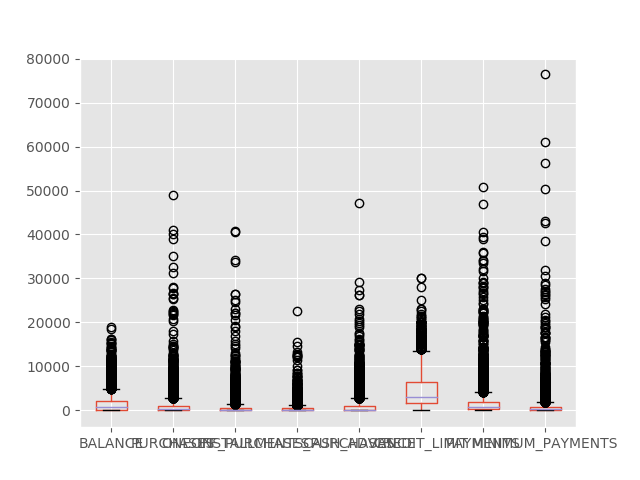

In [21]:
%matplotlib notebook
plt.style.use('ggplot')
df.boxplot(column=['BALANCE','PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE','CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS'])

<IPython.core.display.Javascript object>


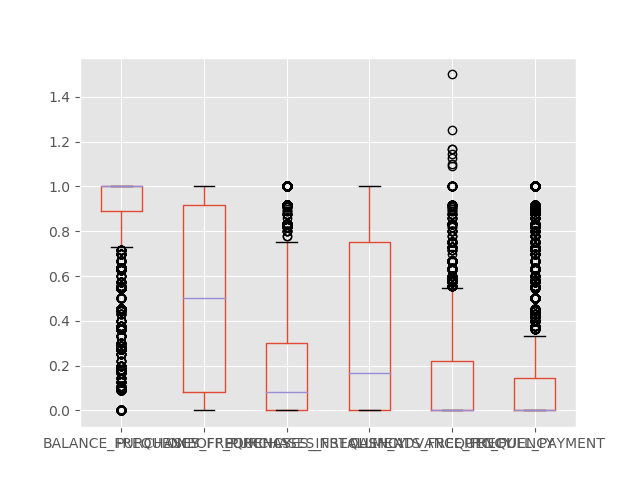

In [22]:
%matplotlib notebook
plt.style.use('ggplot')
df.boxplot(column=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY',
                   'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT'])

<IPython.core.display.Javascript object>


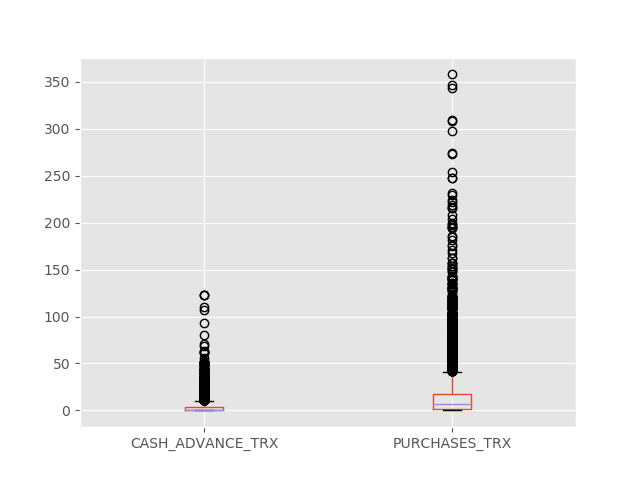

In [23]:
%matplotlib notebook
plt.style.use('ggplot')
df.boxplot(column=['CASH_ADVANCE_TRX', 'PURCHASES_TRX'])

<font color=blue> Running the codes for Outliers tell us there're TONS of Outliers within the dataset. It'd better to treat de data points to achieve a better model and results.

# <font color=blue> || Running the code to treat OUTLIERS

<font color=blue>In order to run the code to treat OUTLIERS we must convert the dtype from INTEGER TO FLOAT

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT           

<font color=blue>We just need to change 3 features: CASH_ADVANCE_TRX, PURCHASES_TRX, TENURE

In [25]:
# Converting INTEGER to FLOAT
df['CASH_ADVANCE_TRX'] = df.CASH_ADVANCE_TRX.astype(float)
df['PURCHASES_TRX'] = df.PURCHASES_TRX.astype(float)
df['TENURE'] = df.TENURE.astype(float)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null float64
PURCHASES_TRX                       8950 non-null float64
CREDIT_LIMIT                        8950 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8950 non-null float64
PRC_FULL_PAYMENT       

<font color=blue>There are many ways to handle OUTLIERS into your dataset. We have chosen the IQR method

Go and check the website for more information: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

In [27]:
# Calculating IQR (interquartile range)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

BALANCE                             1925.858120
BALANCE_FREQUENCY                      0.111111
PURCHASES                           1070.495000
ONEOFF_PURCHASES                     577.405000
INSTALLMENTS_PURCHASES               468.637500
CASH_ADVANCE                        1113.821139
PURCHASES_FREQUENCY                    0.833334
ONEOFF_PURCHASES_FREQUENCY             0.300000
PURCHASES_INSTALLMENTS_FREQUENCY       0.750000
CASH_ADVANCE_FREQUENCY                 0.222222
CASH_ADVANCE_TRX                       4.000000
PURCHASES_TRX                         16.000000
CREDIT_LIMIT                        4900.000000
PAYMENTS                            1517.858151
MINIMUM_PAYMENTS                     693.348888
PRC_FULL_PAYMENT                       0.142857
TENURE                                 0.000000
dtype: float64


In [28]:
# temporary dataset to transforme any data point to FALSE or TRUE
df_temp = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
df_temp

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
6,False,False,True,True,False,False,False,True,False,False,False,True,False,True,False,True,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
df_temp.shape

(8950, 17)

In [30]:
# I NEED TO FIX THE CODE BELOW
'''
# I need to create a code to scan all dataset and count how many False data points and how many True data points there are
def counter_features(dataset):
    sumFalse = 0
    sumTrue = 0
    for i in df_temp:
        if i == 'False':
            sumFalse += 1
        else:
            sumTrue += 1             
    return print (sumFalse, sumTrue)
'''

"\n# I need to create a code to scan all dataset and count how many False data points and how many True data points there are\ndef counter_features(dataset):\n    sumFalse = 0\n    sumTrue = 0\n    for i in df_temp:\n        if i == 'False':\n            sumFalse += 1\n        else:\n            sumTrue += 1             \n    return print (sumFalse, sumTrue)\n"

In [31]:
# counter_features(df_temp)

In [32]:
# Amount of outliers within the dataset (only TRUE)
df_true = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_true.shape

(5942, 17)

In [33]:
# Amount of non-outliers within the dataset (only FALSE)
df_false = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_false.shape

(3008, 17)

In [34]:
a = (df_true.shape[0]/(df_true.shape[0]+df_false.shape[0]))*100
b = (df_false.shape[0]/(df_true.shape[0]+df_false.shape[0]))*100
print (f'The dataset with TRUE (it is a OUTLIER) data points represents {a}% the whole dataset (8950 lines)')
print (f'The dataset with FALSE (it is NOT a OUTLIER) data points represents {b}% the whole dataset (8950 lines)')

The dataset with TRUE (it is a OUTLIER) data points represents 66.39106145251397% the whole dataset (8950 lines)
The dataset with FALSE (it is NOT a OUTLIER) data points represents 33.608938547486034% the whole dataset (8950 lines)


# <font color=blue> || Running the code to define the FINAL DATASET to keep assessing the case 
    (JUST NON-OUTLIERS DATA POINTS)

In [35]:
df_final = df_false
df_final

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,2300.0,679.065082,532.033990,0.000000,12.0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.000000,12.0
14,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,0.083333,1.0,0.0,3000.0,805.647974,989.962866,0.000000,12.0
18,1989.072228,1.000000,504.35,166.00,338.35,0.000000,0.666667,0.083333,0.583333,0.000000,0.0,9.0,13000.0,1720.837373,744.613395,0.000000,12.0
25,169.781679,1.000000,399.60,0.00,399.60,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,3000.0,215.306142,163.005536,0.000000,12.0
26,1615.967240,1.000000,102.00,102.00,0.00,244.840485,0.166667,0.166667,0.000000,0.250000,5.0,2.0,1700.0,890.178845,971.183209,0.000000,12.0
27,125.694817,1.000000,233.28,0.00,233.28,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,12.0,1000.0,207.773715,164.748819,0.000000,12.0
29,22.063490,1.000000,100.00,0.00,100.00,0.000000,0.416667,0.000000,0.416667,0.000000,0.0,5.0,6900.0,160.767773,159.684442,0.000000,12.0


In [36]:
df_final.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [37]:
# dataset backup (it´ll be used to inverse_transform scale)
df_original = df_final

### <font color=blue>* SEARCHING FOR CORRELATIONS

<font color=blue>CORR

<img src = image3.jpg>

**df_final**

In [38]:
df_final.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [39]:
# applying corr code for the same unit of measurament (that's why I've splitted the dataset into 3 blocks)
df_final1 = df_final[['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS']]

df_final2 = df_final[['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY','PRC_FULL_PAYMENT']]

df_final3 = df_final[['CASH_ADVANCE_TRX', 'PURCHASES_TRX','TENURE']]

In [40]:
df_final1.corr()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
BALANCE,1.000000,-0.032371,0.040917,-0.109481,0.367992,0.317996,-0.109730,0.319890,0.211690,0.752261
PURCHASES,-0.032371,1.000000,0.819328,0.668490,-0.203420,-0.222373,0.712788,0.208806,0.210238,0.020358
ONEOFF_PURCHASES,0.040917,0.819328,1.000000,0.121671,-0.125521,-0.120496,0.412143,0.213820,0.188813,0.017785
INSTALLMENTS_PURCHASES,-0.109481,0.668490,0.121671,1.000000,-0.189716,-0.228432,0.699854,0.084232,0.118738,0.012838
CASH_ADVANCE,0.367992,-0.203420,-0.125521,-0.189716,1.000000,0.681281,-0.241726,0.084906,0.325511,0.206053
CASH_ADVANCE_TRX,0.317996,-0.222373,-0.120496,-0.228432,0.681281,1.000000,-0.246919,-0.043053,0.183600,0.209525
PURCHASES_TRX,-0.109730,0.712788,0.412143,0.699854,-0.241726,-0.246919,1.000000,0.080989,0.080711,0.004769
CREDIT_LIMIT,0.319890,0.208806,0.213820,0.084232,0.084906,-0.043053,0.080989,1.000000,0.193273,0.107269
PAYMENTS,0.211690,0.210238,0.188813,0.118738,0.325511,0.183600,0.080711,0.193273,1.000000,0.144446
MINIMUM_PAYMENTS,0.752261,0.020358,0.017785,0.012838,0.206053,0.209525,0.004769,0.107269,0.144446,1.000000


<font color=blue>According to the table (above) those features have a correlation: 

- ONEOFF_PURCHASES X PURCHASES
- INSTALLMENTS_PURCHASES X PURCHASES
- CASH_ADVANCE X BALANCE
- CASH_ADVANCE_TRX X BALANCE
- CASH_ADVANCE_TRX X CASH_ADVANCE
- PURCHASES_TRX X PURCHASES
- PURCHASES_TRX X ONEOFF_PURCHASES
- PURCHASES_TRX X INSTALLMENTS_PURCHASES
- CREDIT_LIMIT X BALANCE 
- PAYMENTS X CASH_ADVANCE  
- MINIMUM_PAYMENTS X BALANCE 

In [41]:
df_final2.corr()

,BALANCE_FREQUENCY,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,PRC_FULL_PAYMENT
BALANCE_FREQUENCY,1.000000,0.017106,0.007094,0.030455,0.107226,-0.275209
PURCHASES_FREQUENCY,0.017106,1.000000,0.330435,0.930287,-0.376966,0.202109
ONEOFF_PURCHASES_FREQUENCY,0.007094,0.330435,1.000000,0.023941,-0.152759,0.014056
PURCHASES_INSTALLMENTS_FREQUENCY,0.030455,0.930287,0.023941,1.000000,-0.320464,0.190821
CASH_ADVANCE_FREQUENCY,0.107226,-0.376966,-0.152759,-0.320464,1.000000,-0.115839
PRC_FULL_PAYMENT,-0.275209,0.202109,0.014056,0.190821,-0.115839,1.000000


<font color=blue>According to the table (above) those features have a correlation: 

- ONEOFF_PURCHASES_FREQUENCY X PURCHASES_FREQUENCY
- PURCHASES_INSTALLMENTS_FREQUENCY X PURCHASES_FREQUENCY
- CASH_ADVANCE_FREQUENCY X PURCHASES_FREQUENCY
- CASH_ADVANCE_FREQUENCY X PURCHASES_INSTALLMENTS_FREQUENCY

In [42]:
df_final3.corr()

,CASH_ADVANCE_TRX,PURCHASES_TRX,TENURE
CASH_ADVANCE_TRX,1.000000,-0.246919,NaN
PURCHASES_TRX,-0.246919,1.000000,NaN
TENURE,NaN,NaN,NaN


<font color=blue>According to the table (above) those features have NO correlation 

<font color=blue>PLOTS 1 *only features with real number as a unit of measurement

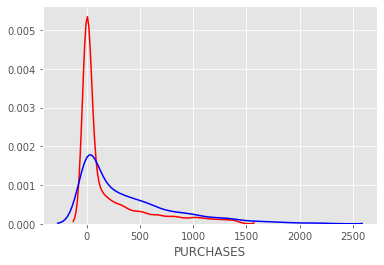

In [43]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['ONEOFF_PURCHASES'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['PURCHASES'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

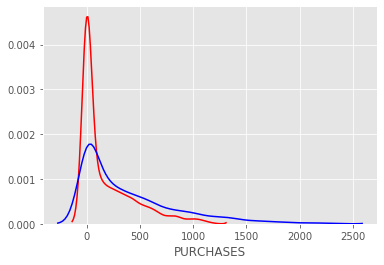

In [44]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['INSTALLMENTS_PURCHASES'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['PURCHASES'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

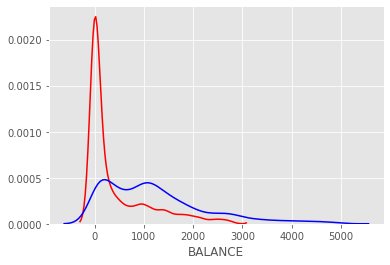

In [45]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['CASH_ADVANCE'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['BALANCE'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

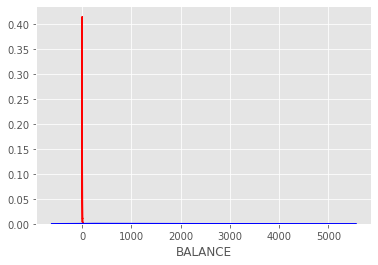

In [46]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['CASH_ADVANCE_TRX'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['BALANCE'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

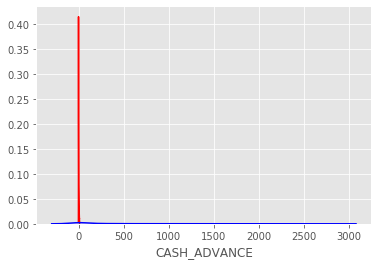

In [47]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['CASH_ADVANCE_TRX'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['CASH_ADVANCE'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

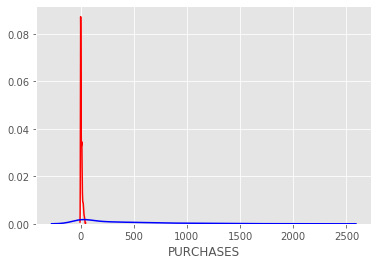

In [48]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['PURCHASES_TRX'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['PURCHASES'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

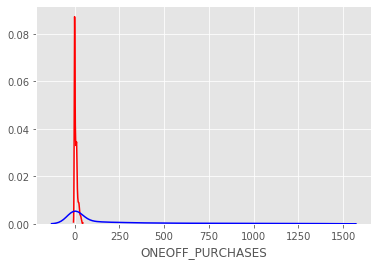

In [49]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['PURCHASES_TRX'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['ONEOFF_PURCHASES'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

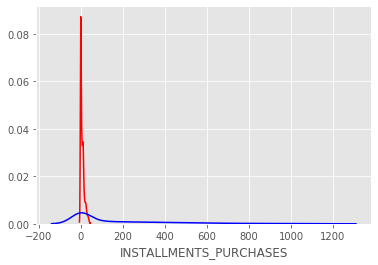

In [50]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['PURCHASES_TRX'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['INSTALLMENTS_PURCHASES'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

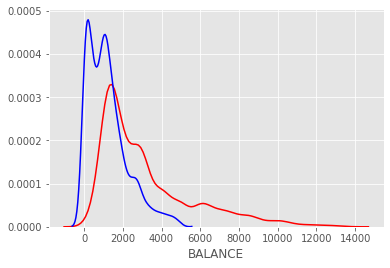

In [51]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['CREDIT_LIMIT'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['BALANCE'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

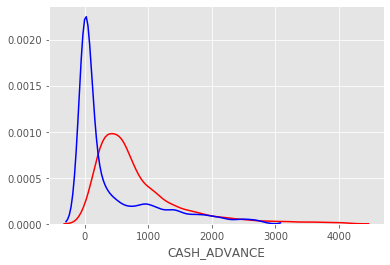

In [52]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['PAYMENTS'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['CASH_ADVANCE'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

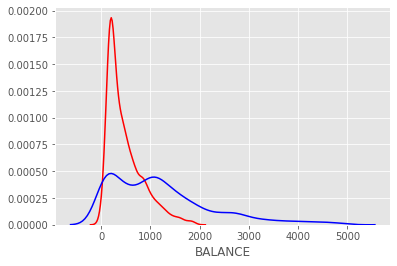

In [53]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['MINIMUM_PAYMENTS'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['BALANCE'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

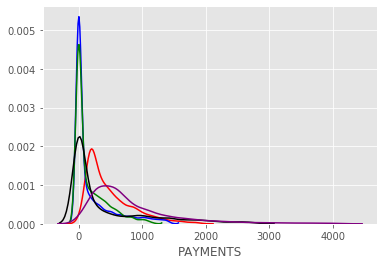

In [54]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['MINIMUM_PAYMENTS'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['ONEOFF_PURCHASES'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['INSTALLMENTS_PURCHASES'], hist=False, kde=True,bins=int(180/5), color='green',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['CASH_ADVANCE'], hist=False, kde=True,bins=int(180/5), color='black',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['PAYMENTS'], hist=False, kde=True,bins=int(180/5), color='purple',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

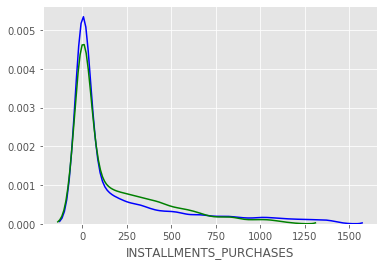

In [55]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['ONEOFF_PURCHASES'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['INSTALLMENTS_PURCHASES'], hist=False, kde=True,bins=int(180/5), color='green',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

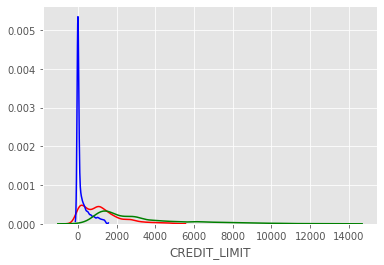

In [56]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['BALANCE'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['ONEOFF_PURCHASES'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['CREDIT_LIMIT'], hist=False, kde=True,bins=int(180/5), color='green',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

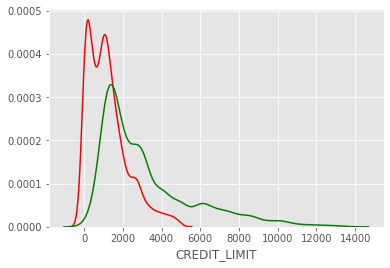

In [57]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['BALANCE'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['CREDIT_LIMIT'], hist=False, kde=True,bins=int(180/5), color='green',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

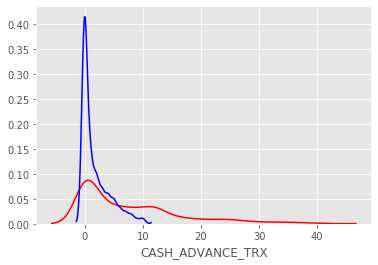

In [58]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['PURCHASES_TRX'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['CASH_ADVANCE_TRX'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

<font color=blue>PLOTS 2 *only features with percent as a unit of measurement

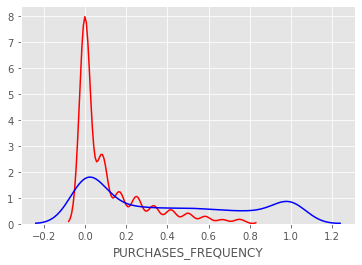

In [59]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['ONEOFF_PURCHASES_FREQUENCY'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['PURCHASES_FREQUENCY'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

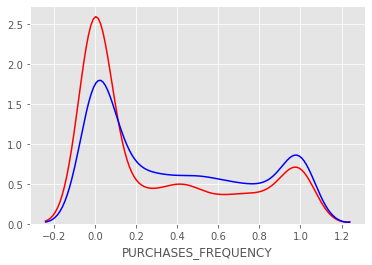

In [60]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['PURCHASES_INSTALLMENTS_FREQUENCY'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['PURCHASES_FREQUENCY'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

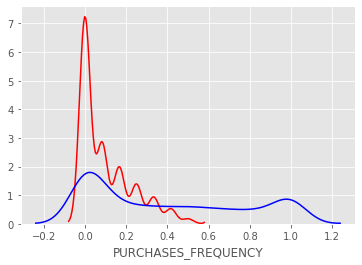

In [61]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['CASH_ADVANCE_FREQUENCY'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['PURCHASES_FREQUENCY'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

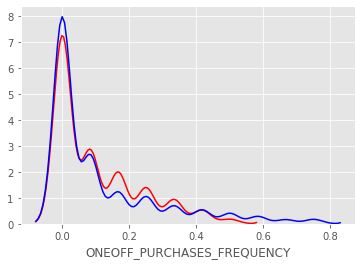

In [62]:
%matplotlib inline
import seaborn as sns
sns.distplot(df_final['CASH_ADVANCE_FREQUENCY'], hist=False, kde=True,bins=int(180/5), color='red',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})
sns.distplot(df_final['ONEOFF_PURCHASES_FREQUENCY'], hist=False, kde=True,bins=int(180/5), color='blue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 1.5})

<font color=blue>Quick conclusion on data visualization:

* <font color=blue> Only three pairs of plots have almost the same behavior and, likely, they explain the phenomenon (which means that we can choose just one of the pair to assess the dataset: PURCHASES_INSTALLMENTS_FREQUENCY X PURCHASES_FREQUENCY, ONEOFF_PURCHASES X INSTALLMENTS_PURCHASES and CASH_ADVANCE_FREQUENCY X ONEOFF_PURCHASES_FREQUENCY 
    
    
* <font color=blue> I've chosen those features: PURCHASES_INSTALLMENTS_FREQUENCY, ONEOFF_PURCHASES and ONEOFF_PURCHASES_FREQUENCY

### <font color=blue>* FEATURES SELECTION

In [21]:
# first step to apply Feature Importance: loading raw dataset
#dataset = pd.read_csv("CC GENERAL.csv")

In [22]:
#dataset.columns

In [23]:
#dataset.info()

In [24]:
#dataset['MINIMUM_PAYMENTS'] = dataset['MINIMUM_PAYMENTS'].fillna(0)
#dataset['CREDIT_LIMIT'] = dataset['CREDIT_LIMIT'].fillna(0)

In [25]:
#dataset.info()

In [26]:
#dataset.drop(['CUST_ID'], axis=1)

#dataset.head(1)

In [27]:
'''
# code for FEATURE IMPORTANCE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

reg = RandomForestRegressor()
X = dataset.drop(['TENURE'], axis=1)
y = dataset['']
X = X.select_dtypes(exclude=['object']) #Remove categorial data

reg.fit(X,y)
fea_imp = pd.DataFrame(reg.feature_importances_,index=X.columns)
print(fea_imp.sort_values(by=0,ascending=False))
'''

"\n# code for FEATURE IMPORTANCE\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.model_selection import train_test_split\n\nreg = RandomForestRegressor()\nX = dataset.drop(['TENURE'], axis=1)\ny = dataset['']\nX = X.select_dtypes(exclude=['object']) #Remove categorial data\n\nreg.fit(X,y)\nfea_imp = pd.DataFrame(reg.feature_importances_,index=X.columns)\nprint(fea_imp.sort_values(by=0,ascending=False))\n"

### <font color=blue>* FEATURES SELECTION

<font color=blue>It's time to drop useless features or features that have a similar behavior!!!! 

* PURCHASES_INSTALLMENTS_FREQUENCY
* INSTALLMENTS_PURCHASES
* ONEOFF_PURCHASES_FREQUENCY


In [63]:
df_final.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

# <font color=blue> || Running the code to choose FEATURES to keep assessing the case
    (JUST NON-OUTLIERS DATA POINTS)

In [64]:
df_final.drop(['PURCHASES_INSTALLMENTS_FREQUENCY',
               'INSTALLMENTS_PURCHASES','ONEOFF_PURCHASES_FREQUENCY',
               'TENURE'], axis=1 , inplace=True)

In [65]:
df_final.shape

(3008, 13)

<font color=blue>***Disclaimer: Don't forget altering the feature scale before running Machine Learning Steps!!!!!!!!!!***

# <font color=blue> || Running the code to fix scale problems
    (JUST NON-OUTLIERS DATA POINTS)

In [66]:
#a = df_final.columns # creating the parameter 'a' to be used in the next code (below) 

In [66]:
# function to standartizate the dataset
def standartization(data):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn import preprocessing
    
    col = data.columns
    x = data.values
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    data_clean = pd.DataFrame(x_scaled, columns=col) 
    
    return (data_clean)

In [68]:
'''def standartization(data):
    from sklearn.preprocessing import StandardScaler
    
    scaler = StandardScaler().fit(data)  
    data_scaled = scaler.transform(data) 
    dataset = pd.DataFrame(data_scaled,a)
    
    return (data_scaled)
'''

'def standartization(data):\n    from sklearn.preprocessing import StandardScaler\n    \n    scaler = StandardScaler().fit(data)  \n    data_scaled = scaler.transform(data) \n    dataset = pd.DataFrame(data_scaled,a)\n    \n    return (data_scaled)\n'

# <font color=blue> || NEW DATASET (clean and standartizated)
    (JUST NON-OUTLIERS DATA POINTS)

In [67]:
df_std_final = standartization(df_final) #call the fucntion

In [69]:
# Close look at the final dataset
df_std_final.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,0.008039,0.333333,0.041194,0.000000,0.000000,0.166667,0.000000,0.0,0.048780,0.063670,0.048765,0.072013,0.0
1,0.165323,1.000000,0.006909,0.011085,0.000000,0.083333,0.000000,0.0,0.024390,0.078652,0.163919,0.127508,0.0
2,0.368999,1.000000,0.188353,0.000000,0.000000,1.000000,0.000000,0.0,0.292683,0.161049,0.164095,0.278917,0.0
3,0.205253,1.000000,0.371996,0.458308,0.000000,0.333333,0.000000,0.0,0.121951,0.513109,0.166321,0.162915,0.0
4,0.561171,1.000000,0.000000,0.000000,0.124748,0.000000,0.166666,0.1,0.000000,0.213483,0.194684,0.520296,0.0


# 4) What's the K clusters to use? 

###### Elbow method to tell how many K number of clusters the code suggest
The elbow method computes the sum of squared distances for clusters k. As more clusters are used, the variance will drop until it reaches a point at which increasing clusters no longer results in a better model.

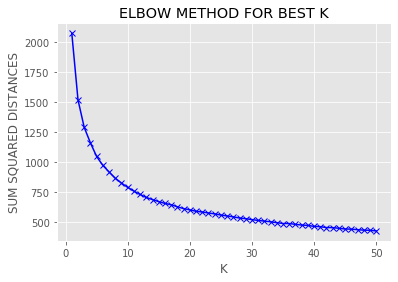

In [70]:
# Elbow method to tell how many K number of clusters
from sklearn.cluster import KMeans
sd2 = []
K = range(1,51) # select the number of range (ex: in this case from 1 to 51)
for k in K:
    k_clusters = KMeans(n_clusters=k)
    k_clusters = k_clusters.fit(df_std_final) #select the dataset inside the brackets
    sd2.append(k_clusters.inertia_)
plt.plot(K, sd2, 'bx-')
plt.xlabel('K')
plt.ylabel('SUM SQUARED DISTANCES')
plt.title('ELBOW METHOD FOR BEST K')
plt.show()

In [71]:
def optimal_number_of_clusters(data):
    wcss = []
    for n in range(1, 51): # select the number of range (ex: in this case from 1 to 51)
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
     
    x1, y1 = 1, wcss[0] #select the number of range
    x2, y2 = 51, wcss[len(wcss)-1] #select the number of range

    distances = []
    for i in range(len(wcss)):
        import math  
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = ((y2 - y1)**2 + (x2 - x1)**2)**0.5
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2

In [72]:
print (f' The best K is equal to: {optimal_number_of_clusters(df_std_final)}') #call the function

 The best K is equal to: 10


#  <font color=red>5) MACHINE LEARNING

**df_std_final**

In [73]:
'''
def MachineLearning(data):
    from sklearn.cluster import KMeans # model
    
    #splitting training and testing datasets
    import numpy as np
    np.random.seed(42) # keep the track 
    chunk = np.random.rand(len(data)) < 0.8 #select the chuck of the dataset you wish (in this case 0.8)
    train = data[chunk]
    test = data[~chunk]
    X_train = np.array(train)
    X_test = np.array(test)
    
    
    model = KMeans(n_clusters = 10, random_state = 42) # instantiate model and selection of the best K number
    
    model_overview = model.fit(X_train) #.fit
    
    yhat = model.predict(X_test) #.predict
  
    return (model,model_overview,yhat)
'''

'\ndef MachineLearning(data):\n    from sklearn.cluster import KMeans # model\n    \n    #splitting training and testing datasets\n    import numpy as np\n    np.random.seed(42) # keep the track \n    chunk = np.random.rand(len(data)) < 0.8 #select the chuck of the dataset you wish (in this case 0.8)\n    train = data[chunk]\n    test = data[~chunk]\n    X_train = np.array(train)\n    X_test = np.array(test)\n    \n    \n    model = KMeans(n_clusters = 10, random_state = 42) # instantiate model and selection of the best K number\n    \n    model_overview = model.fit(X_train) #.fit\n    \n    yhat = model.predict(X_test) #.predict\n  \n    return (model,model_overview,yhat)\n'

In [74]:
#MachineLearning(df_std_final)

### <font color=red>Splitting data into TRAINING DATA and TESTING DATA

In [75]:
import numpy as np
np.random.seed(42) # keep the track 
chunk = np.random.rand(len(df_std_final)) < 0.8 #select the chuck of the dataset you wish (in this case 0.8)
train = df_std_final[chunk]
test = df_std_final[~chunk]
X_train = np.array(train)
X_test = np.array(test)

### <font color=red>Instantiating model

In [76]:
from sklearn.cluster import KMeans # model
model = KMeans(n_clusters = 10, random_state = 42) # instantiate model and selection of the best K number

### <font color=red> .fit (training)

In [77]:
model_overview = model.fit(X_train) #.fit

### <font color=red>. predict (testing)

In [78]:
yhat = model.predict(X_test) #.predict

In [79]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
col = test.columns
#scaler = MinMaxScaler().fit(test)
#dataset = scaler.fit(test)
data_final = MinMaxScaler().fit(df_original).inverse_transform(test)
dataset_final = pd.DataFrame(data_final, columns=col)
dataset_final

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,817.714335,1.000000,16.00,16.00,0.000000,0.083333,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000
1,1615.967240,1.000000,102.00,102.00,244.840485,0.166667,0.250000,5.0,2.0,1700.0,890.178845,971.183209,0.000000
2,4104.710798,1.000000,203.82,203.82,0.000000,0.083333,0.000000,0.0,1.0,4500.0,868.275275,1801.264841,0.000000
3,1360.742377,1.000000,0.00,0.00,1481.587093,0.000000,0.083333,1.0,0.0,1500.0,378.294227,321.354137,0.000000
4,2441.542991,1.000000,808.00,808.00,959.857263,0.250000,0.333333,6.0,4.0,4000.0,532.741699,1026.976000,0.000000
5,408.656365,1.000000,941.64,0.00,0.000000,1.000000,0.000000,0.0,12.0,2500.0,1097.789420,176.610605,0.083333
6,1246.624558,1.000000,423.70,177.64,412.399058,0.666667,0.083333,2.0,10.0,2000.0,577.050373,498.365419,0.000000
7,231.108995,1.000000,440.00,0.00,0.000000,0.916667,0.000000,0.0,22.0,4000.0,554.116542,185.091037,0.000000
8,264.811595,1.000000,28.65,28.65,384.261780,0.083333,0.083333,1.0,1.0,9000.0,1235.630069,194.324456,0.083333
9,906.573724,1.000000,1039.20,80.00,103.102091,0.833333,0.083333,1.0,11.0,13500.0,1855.235407,468.196732,0.083333


In [80]:
dataset_final.shape

(610, 13)

In [81]:
dataset_final['PREDICTED_CLUSTER'] = yhat
dataset_final

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,PREDICTED_CLUSTER
0,817.714335,1.000000,16.00,16.00,0.000000,0.083333,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,6
1,1615.967240,1.000000,102.00,102.00,244.840485,0.166667,0.250000,5.0,2.0,1700.0,890.178845,971.183209,0.000000,2
2,4104.710798,1.000000,203.82,203.82,0.000000,0.083333,0.000000,0.0,1.0,4500.0,868.275275,1801.264841,0.000000,4
3,1360.742377,1.000000,0.00,0.00,1481.587093,0.000000,0.083333,1.0,0.0,1500.0,378.294227,321.354137,0.000000,8
4,2441.542991,1.000000,808.00,808.00,959.857263,0.250000,0.333333,6.0,4.0,4000.0,532.741699,1026.976000,0.000000,3
5,408.656365,1.000000,941.64,0.00,0.000000,1.000000,0.000000,0.0,12.0,2500.0,1097.789420,176.610605,0.083333,1
6,1246.624558,1.000000,423.70,177.64,412.399058,0.666667,0.083333,2.0,10.0,2000.0,577.050373,498.365419,0.000000,1
7,231.108995,1.000000,440.00,0.00,0.000000,0.916667,0.000000,0.0,22.0,4000.0,554.116542,185.091037,0.000000,1
8,264.811595,1.000000,28.65,28.65,384.261780,0.083333,0.083333,1.0,1.0,9000.0,1235.630069,194.324456,0.083333,6
9,906.573724,1.000000,1039.20,80.00,103.102091,0.833333,0.083333,1.0,11.0,13500.0,1855.235407,468.196732,0.083333,1


In [83]:
dataset_summary = dataset_final.groupby('PREDICTED_CLUSTER').mean()
dataset_summary = dataset_summary[['BALANCE', 'PURCHASES', 
                               'CREDIT_LIMIT', 'PURCHASES_FREQUENCY', 
                               'CASH_ADVANCE_FREQUENCY', 
                              'MINIMUM_PAYMENTS','PRC_FULL_PAYMENT', 
                               'PAYMENTS']]

In [84]:
dataset_summary['CREDIT PONTUACTION'] = ((dataset_summary.BALANCE/dataset_summary.CREDIT_LIMIT)*100).round(2)

In [85]:
dataset_summary.sort_values(by='PURCHASES_FREQUENCY', ascending=False).round(2)

,BALANCE,PURCHASES,CREDIT_LIMIT,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,PAYMENTS,CREDIT PONTUACTION
PREDICTED_CLUSTER,,,,,,,,,
1,856.99,498.64,2623.81,0.87,0.02,522.43,0.01,668.89,32.66
9,128.35,463.22,3155.77,0.83,0.00,197.85,0.25,643.31,4.07
3,1999.15,816.89,3405.71,0.74,0.27,757.73,0.02,1425.56,58.70
7,1413.64,1330.82,4556.90,0.67,0.02,503.26,0.02,1079.68,31.02
5,190.48,334.65,3443.75,0.39,0.02,228.69,0.09,607.87,5.53
6,750.54,266.69,2652.50,0.29,0.01,409.84,0.01,509.75,28.30
4,3446.17,173.00,6327.78,0.13,0.13,1086.65,0.00,1007.47,54.46
0,881.38,60.55,2317.86,0.06,0.19,336.61,0.10,2035.93,38.03
2,1930.07,70.73,3250.76,0.05,0.32,660.73,0.01,989.74,59.37


### <font color=red> Conclusions

#### What is a credit limit?

It is the maximum allowable balance your credit card offers in order to increase your purchasing power (the higher the credit limit, the higher your purchasing power, and vice versa). Once you reach the maximum ceiling of this credit limit, your bank will not authorize additional purchases until the pending balance is paid, partially or fully.

Another important issue to consider is the credit score. This ranking is given by the ratio between bank account balance and credit limit. The higher the ratio, the worse the score will be, and vice versa.


#### What are the roles (functions) of bank, credit card brand and user within the credit limit context?
Bank: responsible for issuing the credit card in the brand/banner (Visa, Mastecard, etc) chosen by the customer
Credit Card Brand: companies such as Visa, MasterCard, and others, that connect customer and bank. Basically, one of the credit card functions is to analyze customer profiles and pass such information on to banks.
User: it's the customer interested in increasing their purchasing power.

#### How is the credit limit?
There are a variety of factors to define the credit limit, and each bank defines its own strategy for reaching the most appropriate value. Some factors that affect the credit limit:
* Credit Card Category (eg Gold, Platinum, Black)
* Frequency and buying habits
* Payment historic by customers
* Financial health of customers (income and guarantees)
* Ratio beetwen debts and incomes (credit rating)
* Credit historic
* Historic of credit limits from other credit cards

#### How did the model group the dataset into 10 different groups?
Based on the factors that affect the credit limit value, the dataset used in this study is limited, and does not present all the variables necessary to reach such an answer. It can be concluded that, in this case, probably, the features that most affect the clustering of each data within these 10 groups are:

* Balance (income)
* Purchasing_Frequency (frequency of purchase)
* Payments (payments)

For a deeper and more accurate study, more information is needed, in other words, a dataset that provides more data about each costumer's profile.

Below it's a descripton of the details from some of the groups by using the three main columns:

##### Cluster 1
- cluster 1 spends 1/3 of balance in acquisition (purchase frequency around 30%)
- credit limit 4,5 times greater than the balance
- it prefers to pay their debts by long-term payments

##### Cluster 5
- group has a balance around US$1140 and has no will of spending money (the lowest purchase frequency)
- it has the lowest purchase frequency and also the smallest credit limit
- it pratically never pays in cash its buys

##### Cluster 6
- this group has the highest purchase frequency
- credit limit 3 times greater than its balance
- it prefers to pay their debts by long-term payments

##### Cluster 9
- this group has the lowest balance
- it buys more than makes money (3 times more)
- outstanding credit limit (25 times its balance)
- it pays in cash 3 out of 10 buys
